In [48]:
import random
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
small_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]

In [44]:
def is_probable_prime(n, k=10):
    """Return True if n is probably prime (error ≤ 4⁻ᵏ), else False."""
    if n < 2:
        return False

    # Quick screening by small primes
    for p in small_primes:
        if n == p:
            return True
        if n % p == 0:
            return False

    # Write n-1 as 2^s * d with d odd
    d = n - 1
    s = (d & -d).bit_length() - 1
    d >>= s

    # k rounds of testing
    for _ in range(k):
        a = random.randrange(2, n - 1)
        # a = secrets.randbelow(n - 3) + 2  # for crypto
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(s - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # no break → composite
            return False

    return True

In [45]:
def run_tests(bit_size, trials=10000, k=5):
    """Run the Rabin test `trials` times on random `bit_size`-bit odds.
       Returns (total_time_s, avg_ms, false_positives)."""
    false_positives = 0
    start = time.perf_counter()
    for _ in range(trials):
        n = random.getrandbits(bit_size) | 1 | (1 << (bit_size - 1))
        # ground truth: divisible by any small prime means composite
        if is_probable_prime(n, k) and not all(n % p for p in small_primes):
            false_positives += 1
    elapsed = time.perf_counter() - start
    avg_ms = (elapsed / trials) * 1000
    return elapsed, avg_ms, false_positives

In [47]:
if __name__ == "__main__":
    # Open CSV and write header
    with open('rabin_results.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([
            'bit_size', 'trials', 'k',
            'total_time_s', 'avg_ms_per_test', 'false_positives'
        ])

        # Test for bit-sizes 2^3=8 up to 2^11=2048
        for exp in range(3, 12):
            bit_size = 2 ** exp
            elapsed, avg_ms, false_pos = run_tests(bit_size, trials=10000, k=5)
            writer.writerow([
                bit_size, 10000, 5,
                f"{elapsed:.4f}", f"{avg_ms:.3f}", false_pos
            ])
    print("Results saved to rabin_results.csv")

Results saved to rabin_results.csv


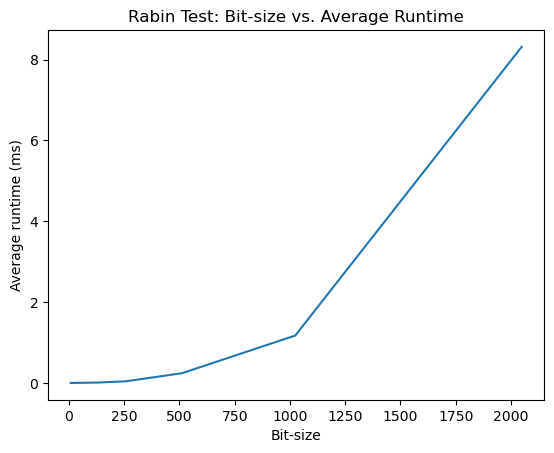

In [49]:
# Load the results
df = pd.read_csv('rabin_results.csv')

# Plot
plt.figure()
plt.plot(df['bit_size'], df['avg_ms_per_test'])
plt.xlabel('Bit-size')
plt.ylabel('Average runtime (ms)')
plt.title('Rabin Test: Bit-size vs. Average Runtime')
plt.show()